In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/images.zip'  # Update with your zip file path

# Directory where you want to extract the files
extract_to_dir = '/content/images'  # Update with your extraction directory path

# Unzip the folder
zip_ref = zipfile.ZipFile(zip_file_path, 'r')
zip_ref.extractall(extract_to_dir)
zip_ref.close()

print("Folder extracted successfully.")


Folder extracted successfully.


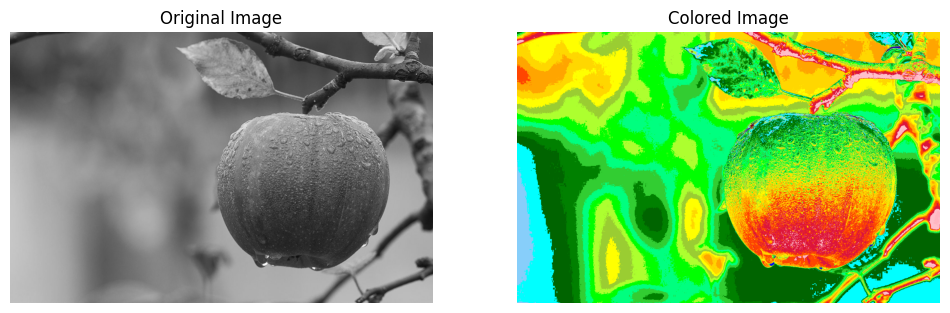

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lookup_table = [
    (255, 105, 180), (255, 182, 193), (255, 192, 203), (220, 20, 60), (255, 69, 0),
    (255, 165, 0), (255, 215, 0), (255, 255, 0), (154, 205, 50), (173, 255, 47),
    (0, 255, 0), (0, 255, 127), (50, 205, 50), (0, 128, 0), (0, 100, 0), (0, 255, 255),
    (135, 206, 250), (173, 255, 47), (128, 0, 0), (0, 0, 255)
]

image = cv2.imread('/content/gray.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_intensity = np.min(gray_image)
max_intensity = np.max(gray_image)

intensity_range = max_intensity - min_intensity
slice_size = intensity_range // 20

colored_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)

for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        intensity = gray_image[i, j]
        index = min(max((intensity - min_intensity) // slice_size, 0), 19)
        colored_image[i, j] = lookup_table[index]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_image)
plt.title('Colored Image')
plt.axis('off')

plt.show()


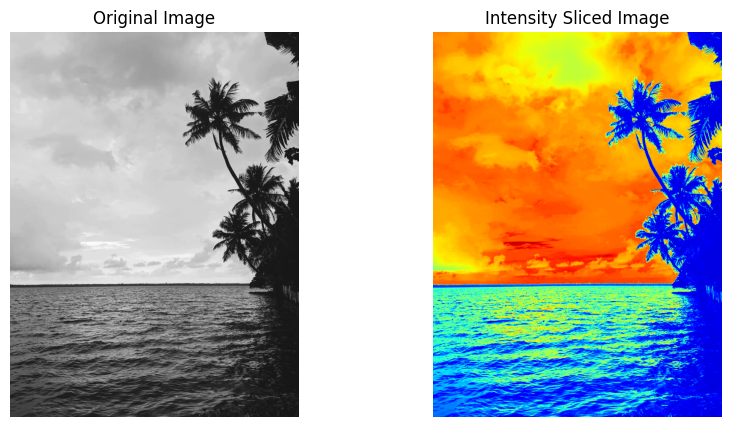

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def intensity_slicing(image, num_slices, color_map):
    slice_range = 256 // num_slices
    colored_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity = image[i, j]
            slice_index = intensity // slice_range
            colored_image[i, j] = color_map[slice_index]
    return colored_image

color_map = plt.cm.jet(np.linspace(0, 1, 256))[:, :3] * 255

image = cv2.imread('/content/52318decbc5b465d8c0e29e7b1ebcea6.jpg', cv2.IMREAD_GRAYSCALE)

colored_image = intensity_slicing(image, 256, color_map)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_image)
plt.title('Intensity Sliced Image')
plt.axis('off')

plt.show()
